In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import EarlyStopping
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


# Loading the test and train data

In [50]:
train_df=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv')
test_df=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv')

In [51]:
train_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [52]:
train_df.shape

(977, 13)

In [53]:
test_df.shape

(325, 13)

# EDA and data preproccesing

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


**How many Manufacturers are there**

In [55]:
train_df.Manufacturer.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

<AxesSubplot:title={'center':'the amount of laptops available per Manufacturer'}>

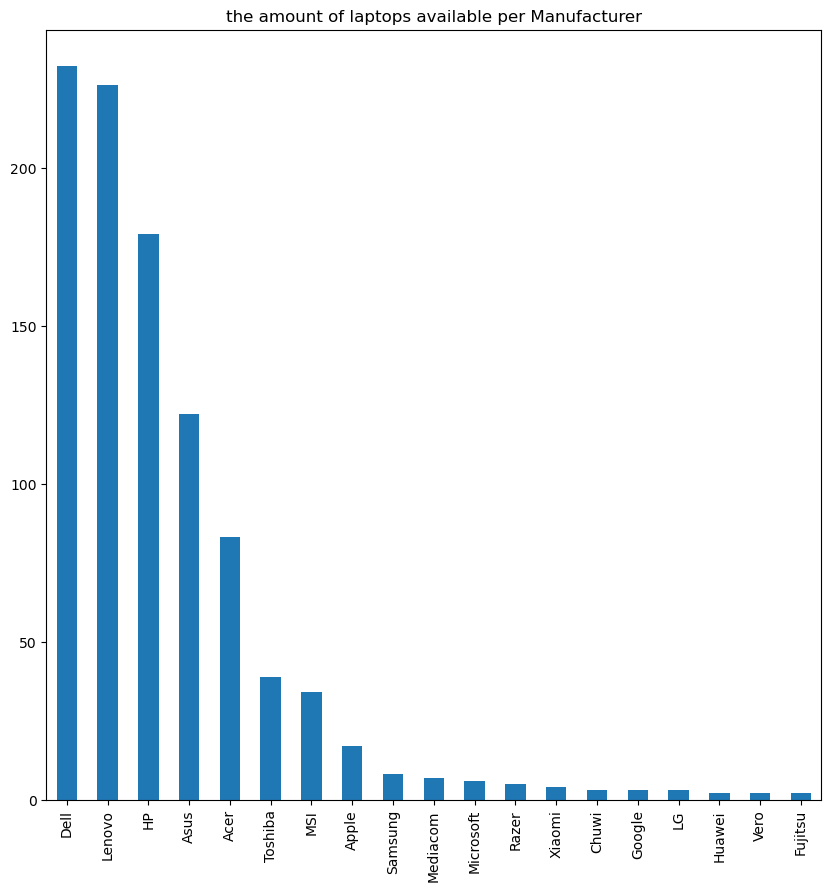

In [56]:
train_df.Manufacturer.value_counts().plot(kind='bar', figsize=(10,10), title="the amount of laptops available per Manufacturer")

Let us see ram and Storage amounts 

In [57]:
train_df.RAM.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

In [58]:
train_df[' Storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

**We can see there is up to 24 Gb avialable**

# Let us explore prices per Manufacturer

In [59]:
dell_laptops=train_df[train_df['Manufacturer']=='Dell']

<AxesSubplot:xlabel='RAM', ylabel='Price'>

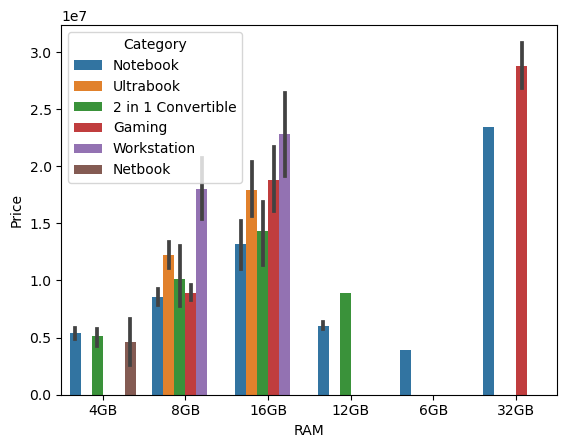

In [60]:
sns.barplot(data=dell_laptops, x='RAM', y='Price',hue='Category')

*As we can see gameing laptop is the most expenxive depndong on the ram*

In [61]:
dell_laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Price', ylabel=' Storage'>

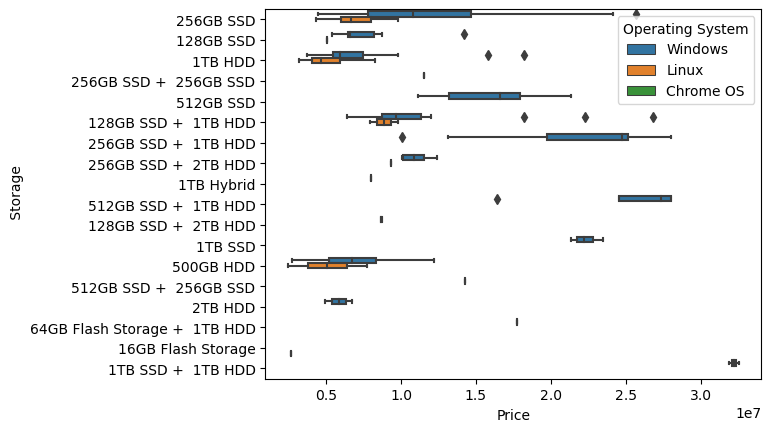

In [62]:
 sns.boxplot(x="Price", y=" Storage", hue='Operating System', data=dell_laptops)

As we can from the Daigram Windows dell laptops with 1TB HDD and 512GB SSD  are very expensive 

<AxesSubplot:xlabel='Price', ylabel='RAM'>

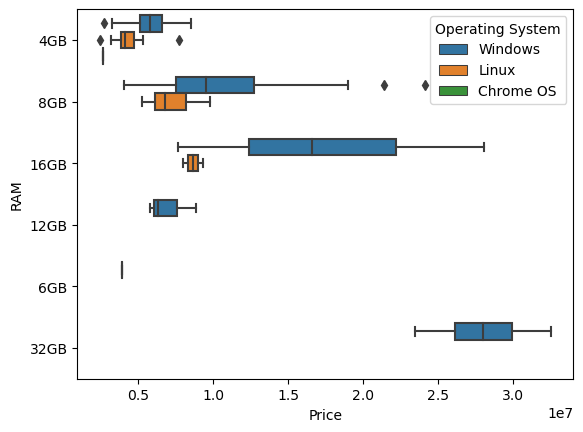

In [63]:
sns.boxplot(x="Price", y="RAM", hue='Operating System', data=dell_laptops)

Still windows laptop with 32 and 16 GB very expensive.

# Does the price matter with the Manufacturer

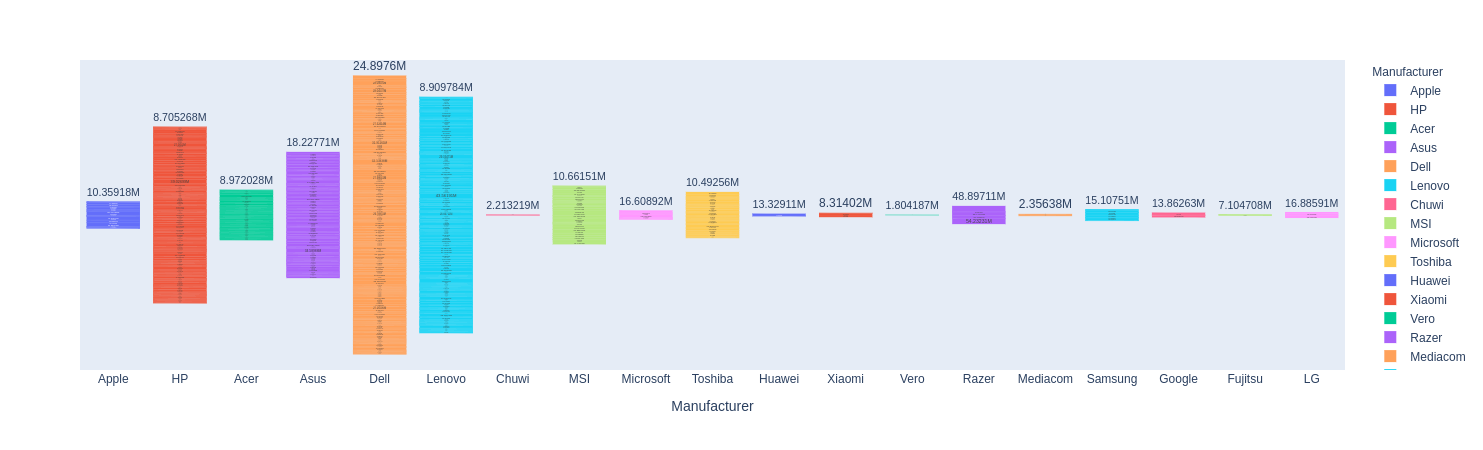

In [64]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig=px.funnel(train_df, x='Manufacturer', y='Price', color='Manufacturer')
fig.show()

# Let us clean the data

In [65]:
train_df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [66]:
train_df=train_df.drop('Operating System Version' ,axis=1)

In [67]:
train_df.isnull().sum()

Manufacturer        0
Model Name          0
Category            0
Screen Size         0
Screen              0
CPU                 0
RAM                 0
 Storage            0
GPU                 0
Operating System    0
Weight              0
Price               0
dtype: int64

In [68]:
train_df['RAM'] = train_df['RAM'].str.replace(r'\D+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [69]:
train_df['RAM'] = train_df['RAM'].astype(int)

In [70]:
train_df['Screen Size'] = train_df['Screen Size'].str.replace(r'\D+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [71]:
train_df['Screen Size'] = train_df['Screen Size'].astype(float)

In [72]:
train_df['Weight'] = train_df['Weight'].str.replace(r'\D+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [73]:
train_df['Weight'] = train_df['Weight'].astype(float)

# Converting catagorical data to numerical data

In [74]:
train_df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,137.0,11912523.48
1,Apple,Macbook Air,Ultrabook,133.0,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,134.0,7993374.48
2,HP,250 G6,Notebook,156.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,186.0,5112900.00
3,Apple,MacBook Pro,Ultrabook,154.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,183.0,22563005.40
4,Apple,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,137.0,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,173.0,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,442.0,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,140.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,195.0,10492560.00
974,Asus,Rog Strix,Gaming,173.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,273.0,18227710.80
975,HP,Probook 450,Notebook,156.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,204.0,8705268.00


In [75]:
train_df.CPU.value_counts()

Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64

In [76]:
def dummies(df,list_to_dummie):
    df_encoded = pd.get_dummies(df[list_to_dummie], prefix=list_to_dummie)

    # Concatenamos los DataFrames originales y el codificado
    df = pd.concat([df, df_encoded], axis=1)
    return df

In [77]:
#     ['Manufacturer',' Storage','GPU','Operating System']
train_df = dummies(train_df ,['Manufacturer'])
train_df  = dummies(train_df ,[' Storage'])
train_df  = dummies(train_df ,['GPU'])
train_df  = dummies(train_df ,['Operating System'])
train_df 

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,...,GPU_Nvidia Quadro M520M,GPU_Nvidia Quadro M620,GPU_Nvidia Quadro M620M,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows,Operating System_macOS
0,Apple,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,1
1,Apple,Macbook Air,Ultrabook,133.0,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,0,0,0,0,0,0,0,1
2,HP,250 G6,Notebook,156.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,0,0,0,0,0,0,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,154.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,0,0,0,0,0,0,0,0,0,1
4,Apple,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,173.0,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,...,0,0,0,0,0,0,0,0,1,0
973,Toshiba,Tecra A40-C-1DF,Notebook,140.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,...,0,0,0,0,0,0,0,0,1,0
974,Asus,Rog Strix,Gaming,173.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,...,0,0,0,0,0,0,0,0,1,0
975,HP,Probook 450,Notebook,156.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,...,0,0,0,0,0,0,0,0,1,0


In [78]:
train_df = train_df.drop('Manufacturer', axis=1)
train_df = train_df.drop(' Storage', axis=1)
train_df = train_df.drop('GPU', axis=1)
train_df = train_df.drop('Operating System', axis=1)

In [79]:
train_df

,Model Name,Category,Screen Size,Screen,CPU,RAM,Weight,Price,Manufacturer_Acer,Manufacturer_Apple,...,GPU_Nvidia Quadro M520M,GPU_Nvidia Quadro M620,GPU_Nvidia Quadro M620M,Operating System_Android,Operating System_Chrome OS,Operating System_Linux,Operating System_Mac OS,Operating System_No OS,Operating System_Windows,Operating System_macOS
0,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,137.0,11912523.48,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Macbook Air,Ultrabook,133.0,1440x900,Intel Core i5 1.8GHz,8,134.0,7993374.48,0,1,...,0,0,0,0,0,0,0,0,0,1
2,250 G6,Notebook,156.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,186.0,5112900.00,0,0,...,0,0,0,0,0,0,0,1,0,0
3,MacBook Pro,Ultrabook,154.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,183.0,22563005.40,0,1,...,0,0,0,0,0,0,0,0,0,1
4,MacBook Pro,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,137.0,16037611.20,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Alienware 17,Gaming,173.0,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32,442.0,24897600.00,0,0,...,0,0,0,0,0,0,0,0,1,0
973,Tecra A40-C-1DF,Notebook,140.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,195.0,10492560.00,0,0,...,0,0,0,0,0,0,0,0,1,0
974,Rog Strix,Gaming,173.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,273.0,18227710.80,0,0,...,0,0,0,0,0,0,0,0,1,0
975,Probook 450,Notebook,156.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,204.0,8705268.00,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
train_df = train_df.drop(['Model Name', 'Screen'], axis=1)

In [81]:
train_df = dummies(train_df ,['Category'])

In [82]:
train_df = train_df.drop('Category', axis=1)

In [83]:
train_df  = dummies(train_df ,['CPU'])

In [84]:
train_df = train_df.drop('CPU', axis=1)

In [85]:
train_df

,Screen Size,RAM,Weight,Price,Manufacturer_Acer,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,Manufacturer_Dell,Manufacturer_Fujitsu,...,CPU_Intel Core i7 7Y75 1.3GHz,CPU_Intel Core i7 8550U 1.8GHz,CPU_Intel Core i7 8650U 1.9GHz,CPU_Intel Pentium Dual Core 4405U 2.1GHz,CPU_Intel Pentium Dual Core N4200 1.1GHz,CPU_Intel Pentium Quad Core N3710 1.6GHz,CPU_Intel Pentium Quad Core N4200 1.1GHz,CPU_Intel Xeon E3-1505M V6 3GHz,CPU_Intel Xeon E3-1535M v5 2.9GHz,CPU_Intel Xeon E3-1535M v6 3.1GHz
0,133.0,8,137.0,11912523.48,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,133.0,8,134.0,7993374.48,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,156.0,8,186.0,5112900.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154.0,16,183.0,22563005.40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,133.0,8,137.0,16037611.20,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,173.0,32,442.0,24897600.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
973,140.0,8,195.0,10492560.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,173.0,16,273.0,18227710.80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,156.0,8,204.0,8705268.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now split the data to test train split

In [86]:
X=train_df.drop('Price', axis=1).values

In [87]:
y=train_df.Price.values

In [88]:
X.shape


(977, 275)

In [89]:
y.shape

(977,)

# Scaling the data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(781, 275)
(196, 275)
(781,)
(196,)


In [91]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[ 0.41573442 -0.09433821 -0.71904165 ... -0.05066946 -0.03580574
  -0.03580574]
 [ 0.41573442 -0.09433821 -0.73496688 ... -0.05066946 -0.03580574
  -0.03580574]
 [-1.18714975  1.52496164 -0.79866782 ... -0.05066946 -0.03580574
  -0.03580574]
 ...
 [ 0.41573442 -0.09433821 -0.71107903 ... -0.05066946 -0.03580574
  -0.03580574]
 [ 1.60047489 -0.09433821 -0.63941548 ... -0.05066946 -0.03580574
  -0.03580574]
 [ 0.41573442 -0.09433821 -0.71904165 ... -0.05066946 -0.03580574
  -0.03580574]]
[[ 1.60047489 -0.09433821 -0.6951538  ... -0.05066946 -0.03580574
  -0.03580574]
 [-1.18714975 -0.09433821  0.17277146 ... -0.05066946 -0.03580574
  -0.03580574]
 [ 1.60047489 -0.09433821 -0.6951538  ... -0.05066946 -0.03580574
  -0.03580574]
 ...
 [ 0.41573442 -0.49916317  0.6584911  ... -0.05066946 -0.03580574
  -0.03580574]
 [-1.18714975  1.52496164 -0.7907052  ... -0.05066946 -0.03580574
  -0.03580574]
 [-0.69931544 -0.09433821 -0.77477997 ... -0.05066946 -0.03580574
  -0.03580574]]


In [92]:
model = Sequential()
model.add(Dense(4000,input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(3500 ,activation='relu'))
model.add(Dense(3000,activation='relu'))
model.add(Dense(2500,activation='relu'))# specify a percentage between 0 and 0.5, or larger # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4000)              1104000   
                                                                 
 dense_5 (Dense)             (None, 3500)              14003500  
                                                                 
 dense_6 (Dense)             (None, 3000)              10503000  
                                                                 
 dense_7 (Dense)             (None, 2500)              7502500   
                                                                 
 dense_8 (Dense)             (None, 1)                 2501      
                                                                 
Total params: 33,115,501
Trainable params: 33,115,501
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [94]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
16/16 [==============================] - 3s 41ms/step - loss: 141785158385664.0000 - mae: 10064626.0000 - val_loss: 122752824508416.0000 - val_mae: 9358253.0000
Epoch 2/5000
16/16 [==============================] - 0s 21ms/step - loss: 92868836327424.0000 - mae: 7694013.5000 - val_loss: 13946715111424.0000 - val_mae: 2501117.0000
Epoch 3/5000
16/16 [==============================] - 0s 15ms/step - loss: 17095011074048.0000 - mae: 2806236.0000 - val_loss: 10633396355072.0000 - val_mae: 2180011.0000
Epoch 4/5000
16/16 [==============================] - 0s 17ms/step - loss: 8418288467968.0000 - mae: 1848667.1250 - val_loss: 7166423990272.0000 - val_mae: 1938002.2500
Epoch 5/5000
16/16 [==============================] - 0s 14ms/step - loss: 5088694763520.0000 - mae: 1478059.0000 - val_loss: 6635359043584.0000 - val_mae: 1856319.1250
Epoch 6/5000
16/16 [==============================] - 0s 19ms/step - loss: 4154500317184.0000 - mae: 1374056.3750 - val_loss: 5261471776768.0000 -

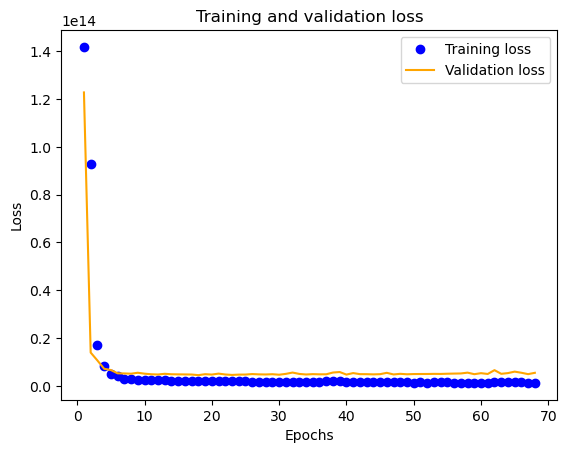

In [95]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


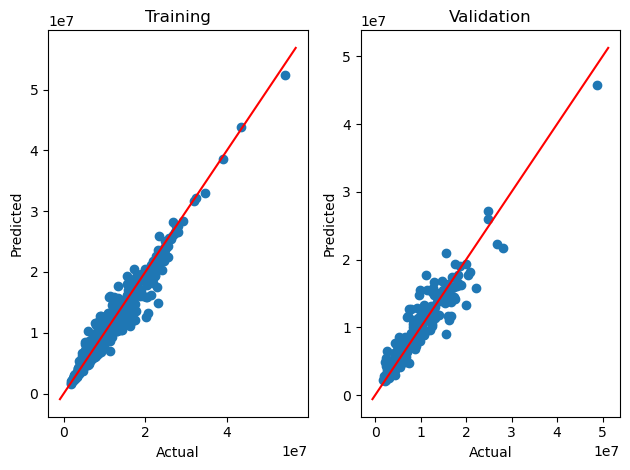

In [96]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [98]:

pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error , accuracy_score 
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

25/25 [==============================] - 0s 2ms/step
879947.5063380282
1518686.8982142855
